In [1]:
import cv2
import numpy as np

file_path = "shuidao/20240914141618.jpg"
# 读取图像
image = cv2.imread(file_path)

# 转换为灰度图
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 去噪处理
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 应用二值化
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 找到种子轮廓
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 统计种子数量
seed_count = len(contours)

# 遍历每个轮廓，计算质心并标记红点
for contour in contours:
    # 计算轮廓的矩
    M = cv2.moments(contour)
    
    # 计算质心坐标
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
    
    # 在质心位置绘制红色小圆点
    cv2.circle(image, (cX, cY), 5, (0, 0, 255), -1)

# 显示带标记的图像
output_image_path = 'output_img/output_image_with_seeds.jpg'
cv2.imwrite(output_image_path, image)

# 打印种子数量
print(f'检测到的种子数目: {seed_count}')
print(f'输出图像已保存至: {output_image_path}')


检测到的种子数目: 95
输出图像已保存至: output_img/output_image_with_seeds.jpg


In [2]:
import cv2
import numpy as np

# 读取图像
image = cv2.imread('shuidao/20240914141618.jpg')

# 转换为灰度图
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 去噪处理（高斯模糊）
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# 应用自适应二值化或Otsu阈值
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 找到种子的轮廓
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 统计种子数量
seed_count = len(contours)

# 遍历每个轮廓，计算质心并标记红点
for contour in contours:
    # 计算轮廓的边界矩
    M = cv2.moments(contour)
    
    # 计算质心坐标
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    
        # 在质心位置绘制红色小圆点
        cv2.circle(image, (cX, cY), 5, (0, 0, 255), -1)

# 保存带标记的图像
output_image_path = 'output_img/output_image_with_seeds.jpg'
cv2.imwrite(output_image_path, image)

# 打印检测到的种子数目
print(f'检测到的种子数目: {seed_count}')
print(f'输出图像已保存至: {output_image_path}')


检测到的种子数目: 577
输出图像已保存至: output_img/output_image_with_seeds.jpg


In [3]:
import cv2
import numpy as np

# 读取图像
image = cv2.imread('shuidao/20240914141618.jpg')

# 转换为灰度图
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 使用直方图均衡化增强对比度
equalized = cv2.equalizeHist(gray)

# 使用高斯模糊降低噪声
blurred = cv2.GaussianBlur(equalized, (5, 5), 0)

# 应用自适应阈值化代替Otsu阈值
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# 使用形态学操作去除噪声
kernel = np.ones((3, 3), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# 找到种子轮廓
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 过滤掉过小的轮廓（噪声）
min_contour_area = 100  # 通过实验选择合适的值
filtered_contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]

# 统计种子数量
seed_count = len(filtered_contours)

# 遍历每个轮廓，计算质心并标记红点
for contour in filtered_contours:
    # 计算轮廓的边界矩
    M = cv2.moments(contour)
    
    # 计算质心坐标
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    
        # 在质心位置绘制红色小圆点
        cv2.circle(image, (cX, cY), 5, (0, 0, 255), -1)

# 保存带标记的图像
output_image_path = 'output_img/output_image_with_seeds.jpg'
cv2.imwrite(output_image_path, image)

# 打印检测到的种子数目
print(f'检测到的种子数目: {seed_count}')
print(f'输出图像已保存至: {output_image_path}')

检测到的种子数目: 33
输出图像已保存至: output_img/output_image_with_seeds.jpg


In [4]:
import cv2
import numpy as np

# 读取图像
image = cv2.imread('shuidao/20240914141618.jpg')
# 使用Canny边缘检测和Hough Circle变换检测种子
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)

# Hough Circle变换来检测近似圆形的种子
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=5, maxRadius=20)

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        # 标记质心
        cv2.circle(image, (x, y), 5, (0, 0, 255), -1)

cv2.imwrite('output_img/output_image_with_seeds2.jpg', image)


True

In [8]:
import cv2
import numpy as np

# 读取图像
image = cv2.imread('shuidao/20240914141618.jpg')
mask = np.zeros(image.shape[:2], np.uint8)

# 定义背景和前景模型
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# 手动标注种子区域的矩形（可以通过实验调整）
rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)

# 应用GrabCut
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# 将可能的前景和确定的前景设置为1，其他为0
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
image_seg = image * mask2[:, :, np.newaxis]

# 转换为灰度图像
gray = cv2.cvtColor(image_seg, cv2.COLOR_BGR2GRAY)

# 连通域分析，标记所有独立的种子
_, labels, stats, centroids = cv2.connectedComponentsWithStats(gray, connectivity=8)

# 绘制质心
for centroid in centroids:
    cX, cY = int(centroid[0]), int(centroid[1])
    cv2.circle(image, (cX, cY), 5, (0, 0, 255), -1)

# 保存标记结果
output_path = 'output_img/output_image_with_seeds3.jpg'
cv2.imwrite(output_path, image)

True

In [9]:
print(len(centroids))

37


In [2]:
# imports:
import cv2
import numpy as np

# Reading an image in default mode:
inputImage = cv2.imread('shuidao/20240914141618.jpg')
# Deep copy for results:
inputImageCopy = inputImage.copy()

# Get local maximum:
kernelSize = 30
maxKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))
localMax = cv2.morphologyEx(inputImage, cv2.MORPH_CLOSE, maxKernel, None, None, 1, cv2.BORDER_REFLECT101)

# Perform gain division
gainDivision = np.where(localMax == 0, 0, (inputImage/localMax))

# Clip the values to [0,255]
gainDivision = np.clip((255 * gainDivision), 0, 255)

# Convert the mat type from float to uint8:
gainDivision = gainDivision.astype("uint8")

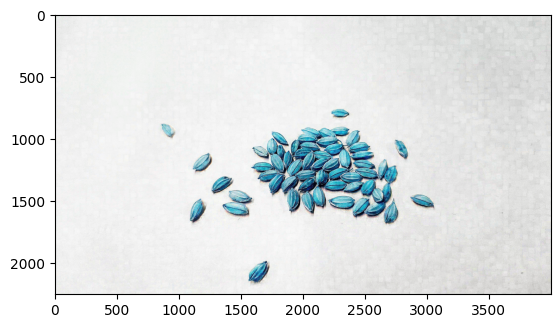

In [3]:
import matplotlib.pyplot as plt
plt.imshow(gainDivision)
plt.show()

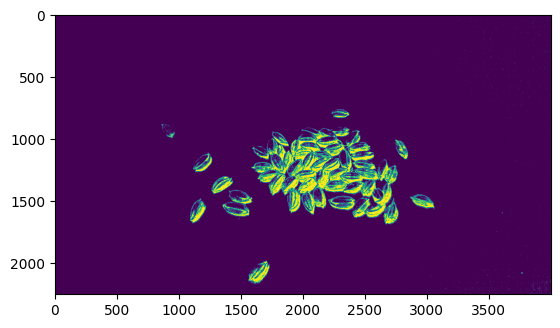

In [4]:
# Convert RGB to grayscale:
grayscaleImage = cv2.cvtColor(gainDivision, cv2.COLOR_BGR2GRAY)

# Get binary image via Otsu:
_, binaryImage = cv2.threshold(grayscaleImage, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(binaryImage)
plt.show()

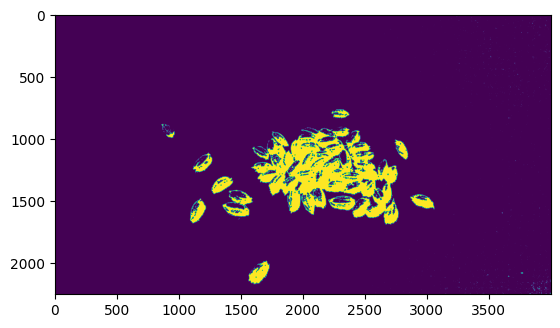

In [9]:
# Set kernel (structuring element) size:
kernelSize = 3
# Set morph operation iterations:
opIterations = 2

# Get the structuring element:
morphKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))

# Perform closing:
binaryImage = cv2.morphologyEx( binaryImage, cv2.MORPH_CLOSE, morphKernel, None, None, opIterations, cv2.BORDER_REFLECT101 )
plt.imshow(binaryImage)
plt.show()

In [2]:
# Find the blobs on the binary image:
contours, hierarchy = cv2.findContours(binaryImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Store the bounding rectangles here:
rectanglesList = []

# Look for the outer bounding boxes (no children):
for _, c in enumerate(contours):

    # Get blob area:
    currentArea = cv2.contourArea(c)
    # Set a min area threshold:
    minArea = 100

    if currentArea > minArea:

        # Approximate the contour to a polygon:
        contoursPoly = cv2.approxPolyDP(c, 3, True)
        # Get the polygon's bounding rectangle:
        boundRect = cv2.boundingRect(contoursPoly)

        # Store rectangles in list:
        rectanglesList.append(boundRect)

        # Get the dimensions of the bounding rect:
        rectX = boundRect[0]
        rectY = boundRect[1]
        rectWidth = boundRect[2]
        rectHeight = boundRect[3]

        # Set bounding rect:
        color = (0, 0, 255)
        cv2.rectangle( inputImageCopy, (int(rectX), int(rectY)),
                   (int(rectX + rectWidth), int(rectY + rectHeight)), color, 2 )

        # cv2.imshow("Rectangles", inputImageCopy)

NameError: name 'cv2' is not defined

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading an image in default mode:
inputImage = cv2.imread('shuidao/20240914141618.jpg')
# Deep copy for results:
inputImageCopy = inputImage.copy()

# Get local maximum:
kernelSize = 30
maxKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))
localMax = cv2.morphologyEx(inputImage, cv2.MORPH_CLOSE, maxKernel, None, None, 1, cv2.BORDER_REFLECT101)

# Perform gain division
gainDivision = np.where(localMax == 0, 0, (inputImage/localMax))

# Clip the values to [0,255]
gainDivision = np.clip((255 * gainDivision), 0, 255)

# Convert the mat type from float to uint8:
gainDivision = gainDivision.astype("uint8")

# Convert RGB to grayscale:
grayscaleImage = cv2.cvtColor(gainDivision, cv2.COLOR_BGR2GRAY)

# Get binary image via Otsu:
_, binaryImage = cv2.threshold(grayscaleImage, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find the blobs on the binary image:
contours, hierarchy = cv2.findContours(binaryImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Store the bounding rectangles here:
rectanglesList = []

# Look for the outer bounding boxes (no children):
for _, c in enumerate(contours):

    # Get blob area:
    currentArea = cv2.contourArea(c)
    # Set a min area threshold:
    minArea = 100

    if currentArea > minArea:

        # Approximate the contour to a polygon:
        contoursPoly = cv2.approxPolyDP(c, 3, True)
        # Get the polygon's bounding rectangle:
        boundRect = cv2.boundingRect(contoursPoly)

        # Store rectangles in list:
        rectanglesList.append(boundRect)

        # Get the dimensions of the bounding rect:
        rectX = boundRect[0]
        rectY = boundRect[1]
        rectWidth = boundRect[2]
        rectHeight = boundRect[3]

        # Set bounding rect:
        # color = (0, 0, 255)
        # cv2.rectangle( inputImageCopy, (int(rectX), int(rectY)),
        #            (int(rectX + rectWidth), int(rectY + rectHeight)), color, 2 )

        # cv2.imshow("Rectangles", inputImageCopy)
        # cv2.waitKey(0)

        print("Elements found: "+str(len(rectanglesList)))

Elements found: 1
Elements found: 2
Elements found: 3
Elements found: 4
Elements found: 5
Elements found: 6
Elements found: 7
Elements found: 8
Elements found: 9
Elements found: 10
Elements found: 11
Elements found: 12
Elements found: 13
Elements found: 14
Elements found: 15
Elements found: 16
Elements found: 17
Elements found: 18
Elements found: 19
Elements found: 20
Elements found: 21
Elements found: 22
Elements found: 23
Elements found: 24
Elements found: 25
Elements found: 26
Elements found: 27


In [4]:
rectanglesList[0]

(1558, 1984, 168, 188)

In [7]:
img = cv2.imread('shuidao/20240914141618.jpg')
for X,Y,W,H in rectanglesList:
    print(X,Y,W,H)
    color = (0, 0, 255)
    cv2.rectangle( img, (int(rectX), int(rectY)),
                (int(rectX + rectWidth), int(rectY + rectHeight)), color, 2 )
    

output_path = 'output_img/output_image_with_seeds4.jpg'
cv2.imwrite(output_path, img)

1558 1984 168 188
1349 1524 213 105
1089 1503 126 179
1111 1485 65 57
2646 1480 119 212
2459 1477 26 12
1415 1474 173 59
1983 1469 23 71
2199 1463 219 117
2857 1454 195 111
2910 1450 42 12
1480 1432 93 77
1261 1318 171 129
1314 1305 88 30
1630 1267 166 91
1782 1198 27 32
1112 1124 152 145
2498 1107 65 25
1602 1078 87 51
1588 1069 14 20
2737 1011 103 157
2120 1003 28 23
903 950 60 46
1747 946 133 119
1578 929 1180 711
2231 915 138 70
2226 779 142 58


True

In [10]:
import cv2
import numpy as np

# 读取图像
img = cv2.imread('shuidao/20240914141618.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)

# 使用Hough Circle变换检测圆形种子
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=5, maxRadius=20)

# 绘制圆和质心
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        # 绘制种子圆
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)
        # 绘制种子的质心
        cv2.circle(img, (x, y), 5, (0, 0, 255), 3)

output_path = 'output_img/output_image_with_seeds5.jpg'
cv2.imwrite(output_path, img)


True